In [2]:
import pickle
import os
import sys
import glob
import tensorflow as tf
import keras
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten

In [3]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict


def load_CIFAR_batch(file): 
    file_dict = unpickle(file)
    Y = file_dict[b'labels']
    X = file_dict[b'data']
    return X, Y

def load_CIFAR10(root):
    os.chdir(root)
    train_batch_list = glob.glob('data_batch*')
    test_batch = glob.glob('test_batch*')
    
    # Training set 
    x_train = ''
    y_train = ''
    for file in train_batch_list:
        x_batch, y_batch = load_CIFAR_batch(file)
        if (x_train == ''):
            x_train = x_batch
            y_train = y_batch
        else:
            x_train = np.concatenate((x_train, x_batch))
            y_train = np.concatenate((y_train, y_batch))
        
    x_train = x_train.reshape((x_train.shape[0], 3, 32, 32)).transpose(0,2,3,1)
    x_test, y_test = load_CIFAR_batch(test_batch[0])
    x_test = x_test.reshape((x_test.shape[0], 3, 32, 32)).transpose(0,2,3,1)
    
    return x_train, y_train, x_test, y_test

path_data = 'cifar-10-batches-py/'
X_train, Y_train, X_test, Y_test = load_CIFAR10(path_data) 

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255


<ipython-input-3-4fdd1157d1b5>:24: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if (x_train == ''):


In [4]:
num_classes = 10
class_names =['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

In [5]:
def cnn1():
    model = Sequential()
    model.add(Conv2D(32,
                     kernel_size=(3,3),
                     activation='relu',
                     input_shape=X_train.shape[1:]))
    model.add(Conv2D(64,
                     kernel_size=(3,3),
                     activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [6]:
def cnn2():
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3),activation='relu', padding = 'same', input_shape=X_train.shape[1:]))
    model.add(Conv2D(32, (3, 3),activation='relu', padding = 'same'))
    model.add(MaxPooling2D(pool_size= (2,2)))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(64, (3, 3),activation='relu', padding = 'same'))
    model.add(Conv2D(64, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size= (2, 2)))
    model.add(Dropout(0.3))

    model.add(Conv2D(128, (3, 3),activation='relu', padding = 'same'))
    model.add(Conv2D(128, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size= (2, 2)))
    model.add(Dropout(0.4))
    
    model.add(Flatten())
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes,activation='softmax'))
    model.compile(loss= 'categorical_crossentropy', optimizer = 'adam', metrics= ['accuracy'])
    return model

In [26]:
model = cnn2()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0

In [27]:
batch_size = 128
epochs = 20

hist = model.fit(X_train, Y_train, 
                 validation_data=(X_test, Y_test), 
                 epochs=epochs, 
                 batch_size=batch_size)

Epoch 1/20
391/391 [==============================] - 39s 101ms/step - loss: 1.8563 - accuracy: 0.2962 - val_loss: 1.4591 - val_accuracy: 0.4557
Epoch 2/20
391/391 [==============================] - 38s 98ms/step - loss: 1.4063 - accuracy: 0.4856 - val_loss: 1.2730 - val_accuracy: 0.5538
Epoch 3/20
391/391 [==============================] - 38s 98ms/step - loss: 1.2090 - accuracy: 0.5659 - val_loss: 1.0453 - val_accuracy: 0.6172
Epoch 4/20
391/391 [==============================] - 38s 98ms/step - loss: 1.0759 - accuracy: 0.6145 - val_loss: 0.9669 - val_accuracy: 0.6561
Epoch 5/20
391/391 [==============================] - 38s 98ms/step - loss: 0.9809 - accuracy: 0.6523 - val_loss: 0.8913 - val_accuracy: 0.6830
Epoch 6/20
391/391 [==============================] - 38s 98ms/step - loss: 0.9118 - accuracy: 0.6776 - val_loss: 0.8333 - val_accuracy: 0.7108
Epoch 7/20
391/391 [==============================] - 38s 98ms/step - loss: 0.8467 - accuracy: 0.7032 - val_loss: 0.7627 - val_accuracy

Test Loss 0.5676113963127136
Test accuracy 0.8082000017166138


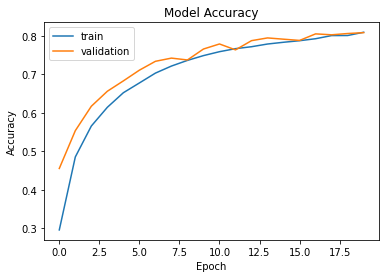

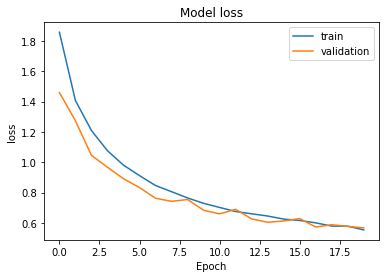

In [38]:
score = model.evaluate(X_test, Y_test, verbose = 0)
print("Test Loss", score[0])
print("Test accuracy", score[1])

plt.figure(1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train','validation'], loc = 'upper left')
('Test accuracy', 0.8015)

plt.figure(2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("Model loss")
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['train','validation'], loc = 'upper right')
plt.show()